In [296]:
%pylab inline
import re,os
n=18
max_l=4
in_root = '/mnt/store1/oliverphilcox/GRFs_aper_dense_big/SE_out/grf'
rand_it = 12

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [303]:
def xi_reader(in_str):
    
    file_name = in_root+'.'+in_str+'.out'

    dat = np.zeros([n,1])

    with open(file_name) as f:
        start=False
        for line in f:
            if not start:
                if re.match("# Binned",line):
                    start=True
                continue
            if len(line.split())==0:
                start=False
                continue
            if re.match('# Multipole',line):
                start=False
                continue
            x=line.split()
            b=int(x[1])
            dat[b,0]=float(x[2])
            
    return dat;
    

In [318]:
rr=xi_reader('0.rrr')

all_xi = []

for mock_no in range(300):
    
    if not os.path.exists(in_root+'.%d.nnn_%d.out'%(mock_no,rand_it-1)):
        continue;

    all_nn=[]
    for i in range(rand_it):
        all_nn.append(xi_reader('%d.nnn_%d'%(mock_no,i)))

    this_nn = np.mean(all_nn,axis=0)
    
    this_xi = this_nn/rr
    
    all_xi.append(this_xi)
    
all_xi = np.asarray(all_xi)
n_mocks1 = len(all_xi)
print("N_mocks = %d"%n_mocks1)

N_mocks = 300


In [334]:
xi_in = '/mnt/store1/oliverphilcox/GRFs_aper_dense_big/lin_xi.xi'
xi_r = np.genfromtxt(xi_in,max_rows=1)
xi_dat = np.genfromtxt(xi_in,skip_header=2)

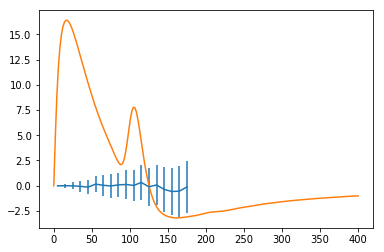

In [335]:
mean_xi = all_xi.mean(axis=0)
std_xi = all_xi.std(axis=0)
plt.errorbar(r_bins,r_bins**2*mean_xi[:,0],yerr=r_bins**2*std_xi[:,0])
plt.plot(xi_r,xi_r**2*xi_dat.mean(axis=1))

In [297]:
def reader(in_str):
    file_name = in_root+'.'+in_str+'.out'

    dat = np.zeros([n,n,max_l+1])

    with open(file_name) as f:
        start=False
        for line in f:
            if not start:
                if re.match("# Multipole",line):
                    start=True
                continue
            if re.match("Multipole",line):
                continue
            if len(line.split())==0:
                start=False
                continue
            if re.match('# Saving',line):
                start=False
                continue
            x=line.split()
            b1=int(x[0])
            b2=int(x[1])
            dat[b1,b2,0]=float(x[2])/2.
            if b1!=b2:
                dat[b2,b1,0]=float(x[2])/2.
            for ell in range(1,max_l+1):
                dat[b1,b2,ell]=float(x[ell+2])*float(x[2])*(2.*ell+1.)/2.
                if b1!=b2:
                    dat[b2,b1,ell]=float(x[ell+2])*float(x[2])*(2.*ell+1.)/2.
    return dat;

In [178]:
rrr=reader('0.rrr')

all_zeta_uncorr = []

for mock_no in range(300):
    
    if not os.path.exists(in_root+'.%d.nnn_%d.out'%(mock_no,rand_it-1)):
        continue;

    all_n=[]
    for i in range(rand_it):
        all_n.append(reader('%d.nnn_%d'%(mock_no,i)))

    this_nnn = np.mean(all_n,axis=0)
    
    this_zeta = this_nnn/rrr[:,:,0].reshape(n,n,1)
    
    all_zeta_uncorr.append(this_zeta)
    
all_zeta_uncorr = np.asarray(all_zeta_uncorr)
n_mocks1 = len(all_zeta_uncorr)
print("N_mocks = %d"%n_mocks1)

N_mocks = 293


In [206]:
r_bins = np.arange(5,180,10)
delta_r = r_bins[1]-r_bins[0]
r_min = r_bins-delta_r/2
min_r_bin = 7

f = rrr

all_zeta = []

def Mjl_calc(j,ell,flist):
    s=0
    for ellprime in np.arange(1,len(flist)):
        s+=wigner_3j(ell,ellprime,j,0,0,0)**2*flist[ellprime]
    s*=(2*j+1)
    return s    

f[:,:,:]/=f[:,:,0].reshape((n,n,1))


for mock_no in range(n_mocks1):
    
    this_zeta = np.zeros([n,n,max_l+1])
    
    print('Window-correcting mock %d of %d'%(mock_no+1,n_mocks1))
    
    for b1 in range(len(r_bins)):
        for b2 in range(len(r_bins)):
            
            Mjl = np.zeros((max_l+1,max_l+1))
            for j in range(max_l+1):
                for k in range(max_l+1):
                    Mjl[j][k]=Mjl_calc(j,k,f[b1,b2,:])
                    
            geometry = np.linalg.inv(np.identity(max_l+1)+Mjl)
            
            this_zeta[b1,b2,:] = geometry.dot(all_zeta_uncorr[mock_no,b1,b2,:])

    all_zeta.append(this_zeta)

Window-correcting mock 1 of 293
Window-correcting mock 2 of 293
Window-correcting mock 3 of 293
Window-correcting mock 4 of 293
Window-correcting mock 5 of 293
Window-correcting mock 6 of 293
Window-correcting mock 7 of 293
Window-correcting mock 8 of 293
Window-correcting mock 9 of 293
Window-correcting mock 10 of 293
Window-correcting mock 11 of 293
Window-correcting mock 12 of 293
Window-correcting mock 13 of 293
Window-correcting mock 14 of 293
Window-correcting mock 15 of 293
Window-correcting mock 16 of 293
Window-correcting mock 17 of 293
Window-correcting mock 18 of 293
Window-correcting mock 19 of 293
Window-correcting mock 20 of 293
Window-correcting mock 21 of 293
Window-correcting mock 22 of 293
Window-correcting mock 23 of 293
Window-correcting mock 24 of 293
Window-correcting mock 25 of 293
Window-correcting mock 26 of 293
Window-correcting mock 27 of 293
Window-correcting mock 28 of 293
Window-correcting mock 29 of 293
Window-correcting mock 30 of 293
Window-correcting m

Window-correcting mock 246 of 293
Window-correcting mock 247 of 293
Window-correcting mock 248 of 293
Window-correcting mock 249 of 293
Window-correcting mock 250 of 293
Window-correcting mock 251 of 293
Window-correcting mock 252 of 293
Window-correcting mock 253 of 293
Window-correcting mock 254 of 293
Window-correcting mock 255 of 293
Window-correcting mock 256 of 293
Window-correcting mock 257 of 293
Window-correcting mock 258 of 293
Window-correcting mock 259 of 293
Window-correcting mock 260 of 293
Window-correcting mock 261 of 293
Window-correcting mock 262 of 293
Window-correcting mock 263 of 293
Window-correcting mock 264 of 293
Window-correcting mock 265 of 293
Window-correcting mock 266 of 293
Window-correcting mock 267 of 293
Window-correcting mock 268 of 293
Window-correcting mock 269 of 293
Window-correcting mock 270 of 293
Window-correcting mock 271 of 293
Window-correcting mock 272 of 293
Window-correcting mock 273 of 293
Window-correcting mock 274 of 293
Window-correct

In [207]:
all_zeta = np.asarray(all_zeta)
n_mocks = len(all_zeta)

In [213]:
r_bins = np.arange(5,180,10)
delta_r = r_bins[1]-r_bins[0]
r_min = r_bins-delta_r/2
min_r_bin = 7

vol_r = 4.*np.pi/3.*((r_min+delta_r)**3-r_min**3)

zeta_compress = np.zeros([n_mocks,n-min_r_bin,max_l+1])

for i in range(n_mocks):
    denom = np.zeros([n-min_r_bin])

    for b1 in range(min_r_bin,n):
        for b2 in range(3,b1-3):
            zeta_compress[i,b1-min_r_bin,:]+=all_zeta[i,b1,b2,:]*vol_r[b2]
            denom[b1-min_r_bin]+=vol_r[b2]
        zeta_compress[i,b1-min_r_bin,:]/=denom[b1-min_r_bin]

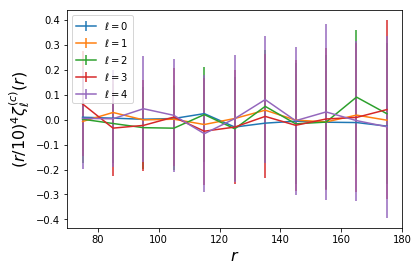

In [214]:
for ell in range(max_l+1):
    plt.errorbar(r_bins[min_r_bin:],(r_bins[min_r_bin:]/10)**4*zeta_compress.mean(axis=0)[:,ell],
                 (r_bins[min_r_bin:]/10.)**4*zeta_compress.std(axis=0)[:,ell],label=r'$\ell=%d$'%ell)
plt.legend();
plt.ylabel(r'$(r/10)^4\zeta^{(c)}_\ell(r)$',fontsize=16);
plt.xlabel(r'$r$',fontsize=16);

In [259]:
zeta_compress_flat=[]
for i in range(n_mocks):
    zeta_compress_flat.append(zeta_compress[i].T.ravel())
zeta_compress_flat=np.asarray(zeta_compress_flat)

cov_zeta = np.cov(zeta_compress_flat.T)

In [260]:
def plotter(mat,vmax=np.inf,perc=99,rmax=0):
    if vmax==np.inf:
        vmax=np.percentile(mat,perc)
    plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r);
    plt.colorbar();
    if rmax==0:
        rmax = len(mat)
    plt.ylim([-0.5,rmax-0.5])
    plt.xlim([-0.5,rmax-0.5])

## Load theory:

In [261]:
theory = np.load('/mnt/store1/oliverphilcox/GRFs_aper_dense_big/compressed_theory_cov.npz')
c_theory = theory['c_tot']#*1.5**3
c3=theory['c3']
c4=theory['c4']
c5=theory['c5']
c6=theory['c6']
c_theory=c3+c4/10+c5/100+c6/1000#theory['c_tot']

In [262]:
from scipy.optimize import minimize
def KL_div(a_vec):
    a3,a4,a5,a6=a_vec
    c_th = c3*a3+c4*a4+c5*a5+c6*a6
    prec = np.linalg.inv(c_th)
    slog1=np.linalg.slogdet(prec)
    if slog1[0]<0:
        return np.inf
    slog2=np.linalg.slogdet(cov_zeta)
    if slog2[0]<0:
        return np.inf
    return np.trace(np.matmul(prec,c_th))-slog1[1]-slog2[1]

out=minimize(KL_div,[1,0,0,0])
out

      fun: 19.807366958592866
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 55.        , 143.37464905, 155.7578125 ,  38.06556702])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 46
      nit: 0
     njev: 6
   status: 2
  success: False
        x: array([1., 0., 0., 0.])

In [263]:
cov_th=c3*out.x[0]+c4*out.x[1]+c5*out.x[2]+c6*out.x[3]

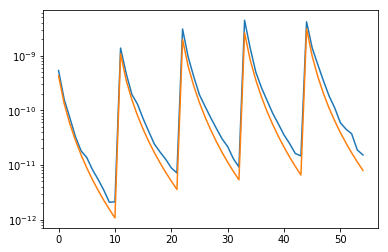

In [264]:
plt.plot(np.diag(cov_zeta));
plt.plot(np.diag(c_theory))
plt.yscale('log');

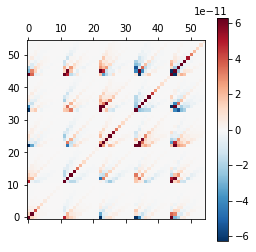

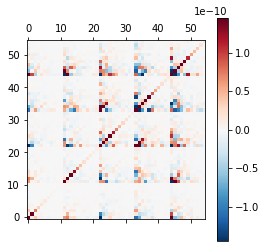

In [265]:
plotter(c3)
plotter(cov_zeta)

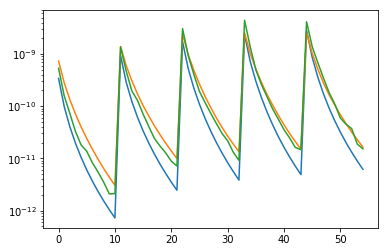

In [266]:
plt.plot(np.diag(c3))
plt.plot(np.diag(c4))
plt.plot(np.diag(cov_zeta))
plt.yscale('log')

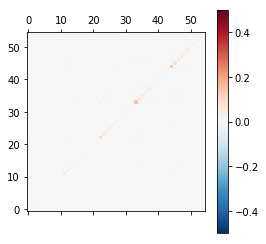

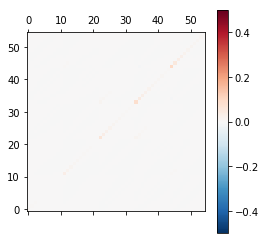

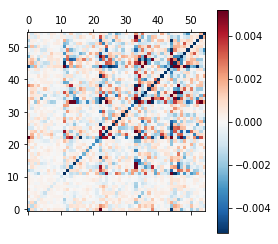

In [241]:
plotter(cov_zeta*theory['r_mat'],vmax=0.5)
plotter(c_theory*theory['r_mat'],vmax=0.5)
plotter((c_theory-cov_zeta)*theory['r_mat'])

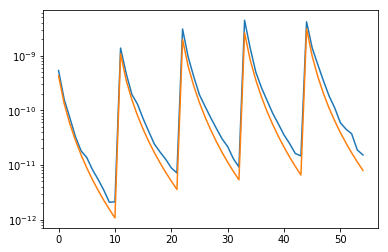

In [242]:
plt.plot(np.diag(cov_zeta))
plt.plot(np.diag(c_theory))
plt.yscale('log')

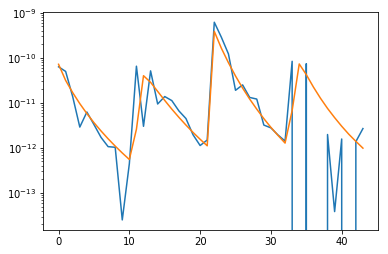

In [243]:
plt.plot(np.diag(cov_zeta[:,11:]))
plt.plot(np.diag(c_theory[:,11:]))
plt.yscale('log');

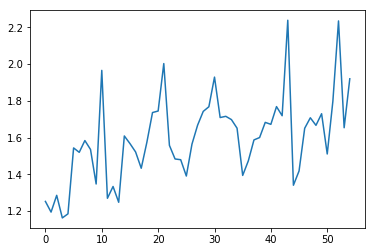

In [244]:
plt.plot(np.diag(cov_zeta/c_theory))

In [245]:
def reduce(mat):
    out_mat = np.zeros_like(mat)
    for i in range(len(mat)):
        for j in range(len(mat)):
            out_mat[i,j]=mat[i,j]/np.sqrt(mat[i,i]*mat[j,j])
    return out_mat

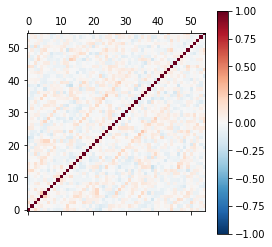

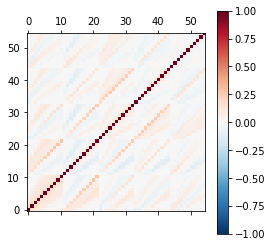

In [246]:
plotter(reduce(cov_zeta))
plotter(reduce(c_theory))

In [247]:
D_mat = (len(cov_zeta)+1.)/(n_mocks-1.)
prec_theory=np.linalg.inv(c_theory)
prec_obs = np.linalg.inv(cov_zeta)*(1.-D_mat)

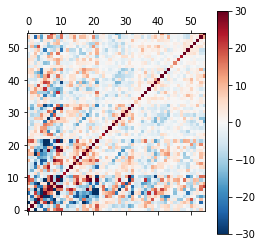

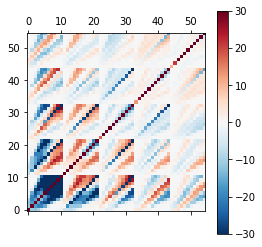

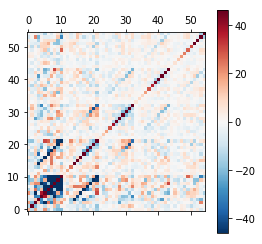

In [248]:
plotter(prec_obs/theory['r_mat'],vmax=30)
plotter(prec_theory/theory['r_mat'],vmax=30)
plotter((prec_theory-prec_obs)/theory['r_mat'])

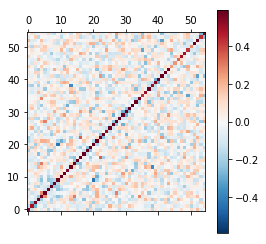

In [249]:
chol = np.linalg.cholesky(cov_zeta)
disc = np.matmul(chol.T,np.matmul(prec_theory,chol))-np.eye(len(prec_theory))
plotter(disc)